In [1]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifier_trainer import ClassifierTrainer
from cs231n.gradient_check import eval_numerical_gradient
from cs231n.classifiers.convnet import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from cs231n.activation_statistics import activation_statistics

input layer had mean 0.001704 and std 1.000519
hidden layer 1 had mean 0.000000 and std 0.000000
hidden layer 2 had mean 0.000000 and std 0.000000
hidden layer 3 had mean 0.000000 and std 0.000000
hidden layer 4 had mean 0.000000 and std 0.000000
hidden layer 5 had mean 0.000000 and std 0.000000
hidden layer 6 had mean 0.000000 and std 0.000000
hidden layer 7 had mean 0.000000 and std 0.000000
hidden layer 8 had mean 0.000000 and std 0.000000
hidden layer 9 had mean 0.000000 and std 0.000000
hidden layer 10 had mean 0.000000 and std 0.000000


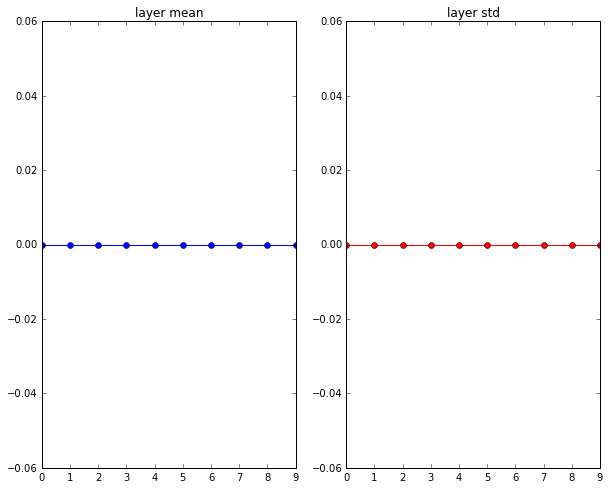

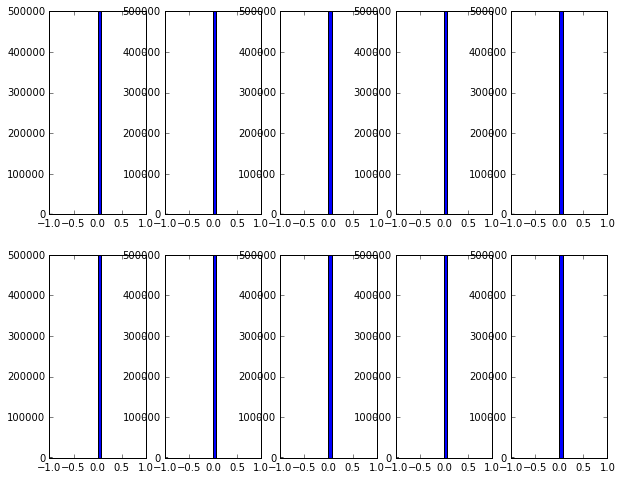

In [3]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 0)

input layer had mean 0.000400 and std 1.002698
hidden layer 1 had mean -0.000071 and std 0.213919
hidden layer 2 had mean 0.000039 and std 0.047792
hidden layer 3 had mean 0.000019 and std 0.010691
hidden layer 4 had mean -0.000001 and std 0.002378
hidden layer 5 had mean -0.000001 and std 0.000533
hidden layer 6 had mean -0.000000 and std 0.000119
hidden layer 7 had mean 0.000000 and std 0.000027
hidden layer 8 had mean -0.000000 and std 0.000006
hidden layer 9 had mean 0.000000 and std 0.000001
hidden layer 10 had mean -0.000000 and std 0.000000


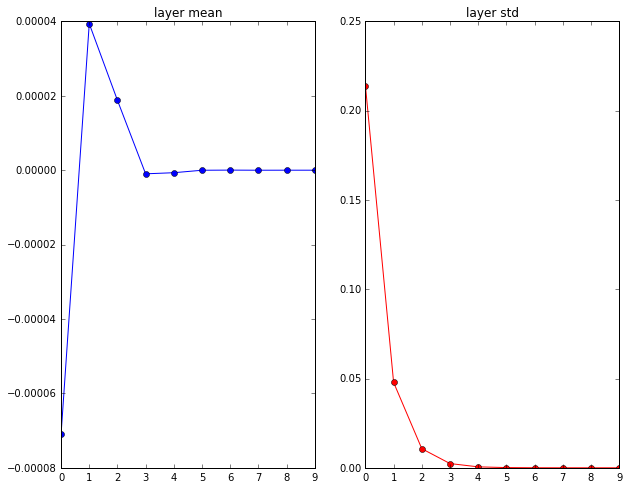

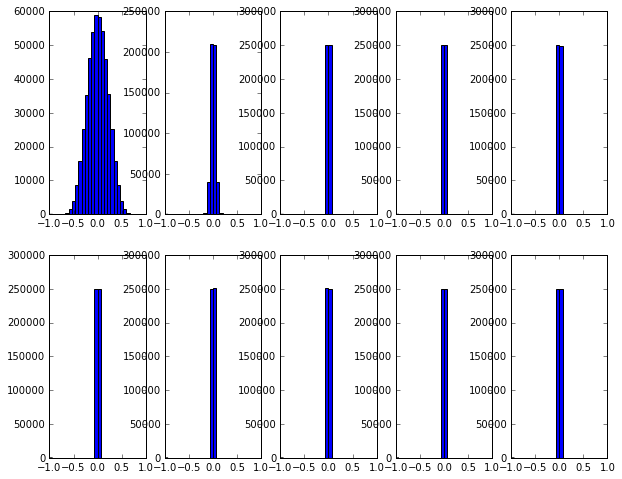

In [4]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 0.01)

input layer had mean -0.001503 and std 0.999815
hidden layer 1 had mean -0.001300 and std 0.981988
hidden layer 2 had mean 0.000286 and std 0.981774
hidden layer 3 had mean -0.001874 and std 0.981753
hidden layer 4 had mean 0.000941 and std 0.981498
hidden layer 5 had mean -0.000331 and std 0.981800
hidden layer 6 had mean 0.000231 and std 0.981612
hidden layer 7 had mean -0.000261 and std 0.981746
hidden layer 8 had mean 0.000026 and std 0.981631
hidden layer 9 had mean 0.001320 and std 0.981633
hidden layer 10 had mean -0.000188 and std 0.981773


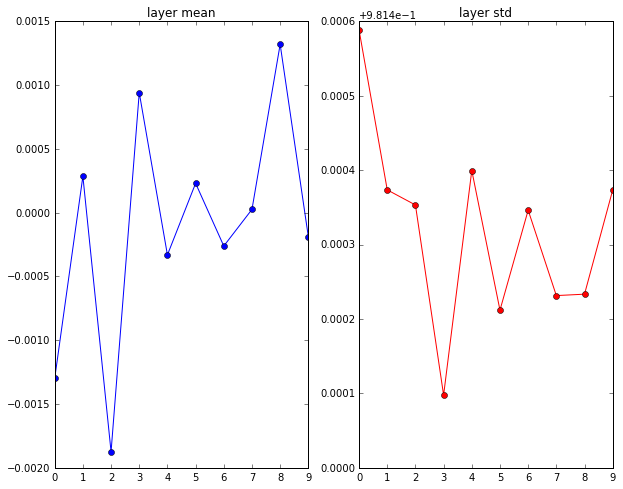

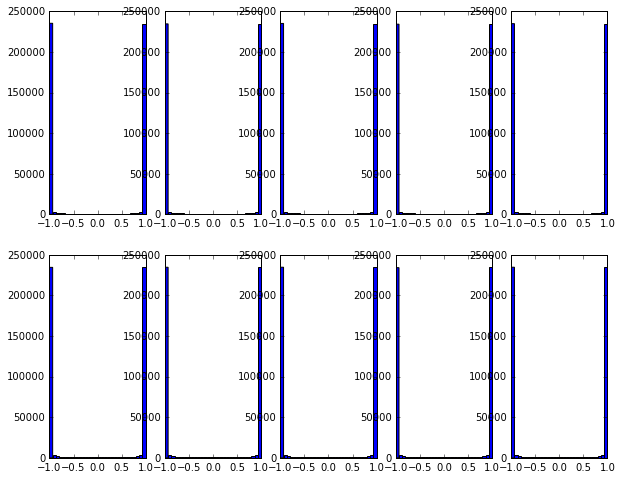

In [5]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 1)

input layer had mean -0.000778 and std 0.998370
hidden layer 1 had mean -0.001305 and std 0.998163
hidden layer 2 had mean 0.001318 and std 0.998195
hidden layer 3 had mean -0.000039 and std 0.998225
hidden layer 4 had mean -0.002070 and std 0.998177
hidden layer 5 had mean -0.000884 and std 0.998163
hidden layer 6 had mean 0.001317 and std 0.998227
hidden layer 7 had mean -0.000292 and std 0.998193
hidden layer 8 had mean 0.000748 and std 0.998204
hidden layer 9 had mean -0.000907 and std 0.998257
hidden layer 10 had mean -0.002122 and std 0.998208


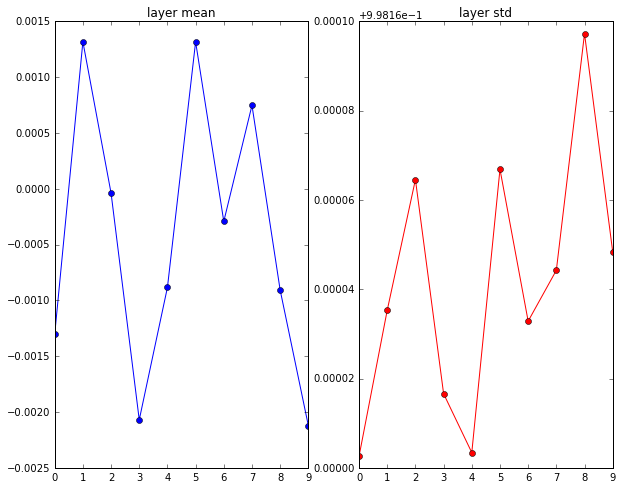

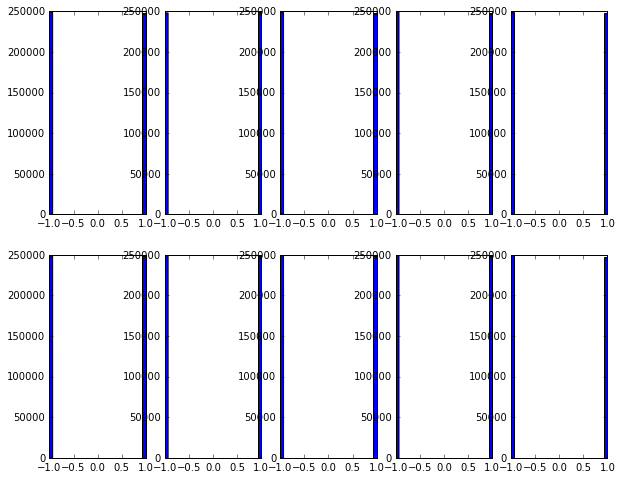

In [6]:
activation_statistics(init_func=lambda fan_in, fan_out: np.random.randn(fan_in, fan_out) * 10)